### What are decision trees?
A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

Decision tree learning employs a divide and conquer strategy by conducting a greedy search to identify the optimal split points within a tree. This process of splitting is then repeated in a top-down, recursive manner until all, or the majority of records have been classified under specific class labels. Whether or not all data points are classified as homogenous sets is largely dependent on the complexity of the decision tree. Smaller trees are more easily able to attain pure leaf nodes—i.e. data points in a single class.

The internal nodes present within the tree describe the various test cases. Decision Trees can be used to solve both classification and regression problems. The algorithm can be thought of as a graphical tree-like structure that uses various tuned parameters to predict the results. The decision trees apply a top-down approach to the dataset that is fed during training.

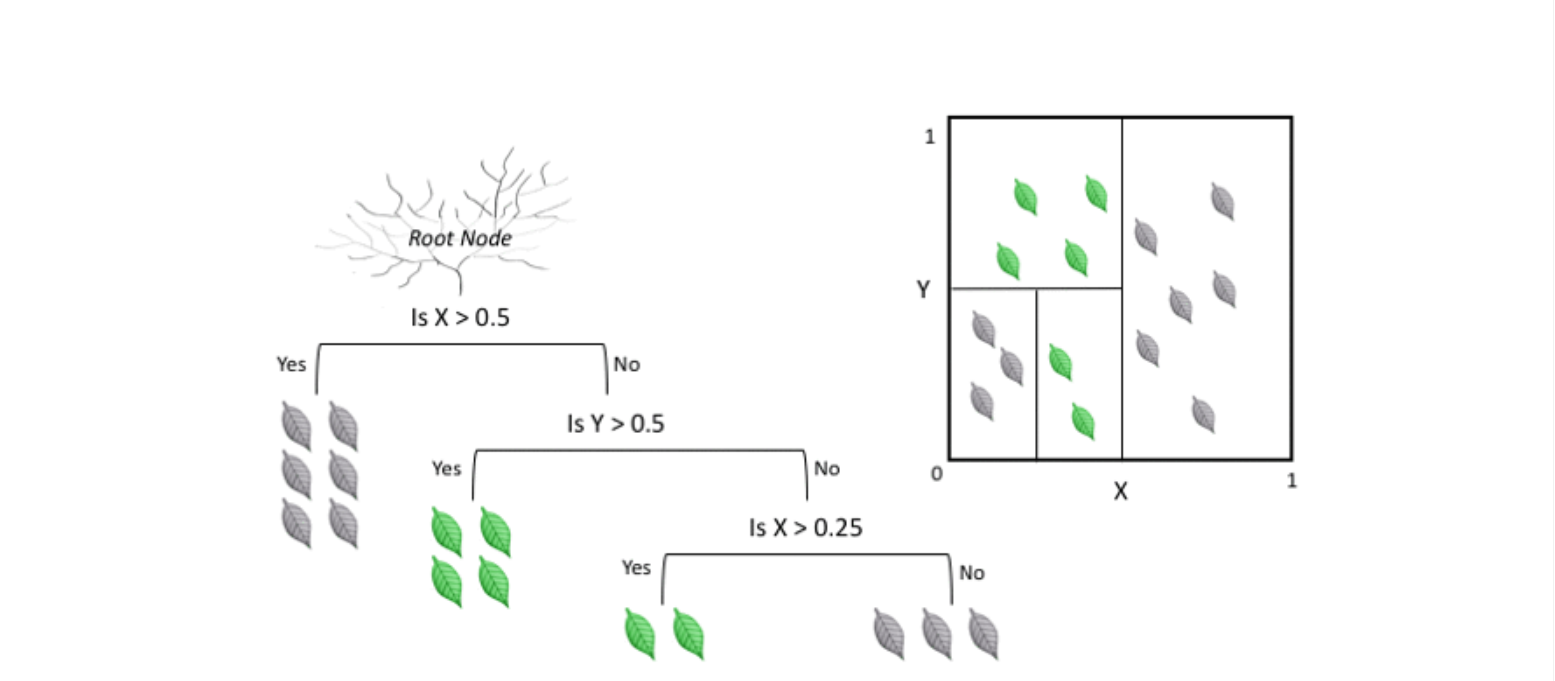

### How do decision trees classify?
The key idea is to use a decision tree to partition the data space into dense regions and sparse regions. The splitting of a binary tree can either be binary or multiway. The algorithm keeps on splitting the tree until the data is sufficiently homogeneous. At the end of the training, a decision tree is returned that can be used to make optimal categorized predictions.

### Fitting
An important term in the development of this algorithm is Entropy. It can be considered as the measure of uncertainty of a given dataset and its value describes the degree of randomness of a particular node. Such a situation occurs when the margin of difference for a result is very low and the model thereby doesn’t have confidence in the accuracy of the prediction.

The higher the entropy, the higher will be the randomness in the dataset. While building a decision tree, a lower entropy shall be preferred.

Another metric used for a similar purpose is the <b>Gini Index</b>. It uses the Gini method to create split points. Information Gain is the metric that is generally used for measuring the reduction of uncertainty in the dataset.

Another method by which over-fitting can be avoided to a great extent is by removing branches that have little or no significance in the decision-making process. This is referred to as <b>Pruning</b>. There are two different types of pruning — pre-pruning and post-pruning. Pre-pruning is done while growing the tree while post-pruning prunes nodes after it's built to depth.

<b>Dataset :</b> Car Evaluation Data Set<br>
<b>Task :</b> Predict class

In [3]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# load dataset
data = pd.read_csv("car_evaluation.csv")

# assign column names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names

# show sample
data.head(4)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc


In [9]:
# Data cleaning
data.dropna(inplace=True)
# EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
# Split data into inputs and outputs
X = data.drop(["class"], axis =1)
y = data["class"]

In [14]:
# Apply encoding
# This is because the data is categorical and decision trees work on numerical value.
# We convert the categorical data into numerical data using ordinal encoding in this example.This is a simple explanation.
# Please read more about encoding and different types of encoding like one-hot encoding.
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

X_encoded = enc.fit_transform(X)
X[X.columns] = X_encoded
print(X)

      buying  maint  doors  persons  lug_boot  safety
0        3.0    3.0    0.0      0.0       2.0     2.0
1        3.0    3.0    0.0      0.0       2.0     0.0
2        3.0    3.0    0.0      0.0       1.0     1.0
3        3.0    3.0    0.0      0.0       1.0     2.0
4        3.0    3.0    0.0      0.0       1.0     0.0
...      ...    ...    ...      ...       ...     ...
1722     1.0    1.0    3.0      2.0       1.0     2.0
1723     1.0    1.0    3.0      2.0       1.0     0.0
1724     1.0    1.0    3.0      2.0       0.0     1.0
1725     1.0    1.0    3.0      2.0       0.0     2.0
1726     1.0    1.0    3.0      2.0       0.0     0.0

[1727 rows x 6 columns]


In [15]:
# Split into test-train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### Read more about random_state from DecisionTreesRegression.py markdowns

In [28]:
# Fitting model
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)   # criterion can also be set to 'gini'
# clf_en = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)   # criterion can also be set to 'entropy'
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)
print(y_pred_en[:5])

['unacc' 'unacc' 'unacc' 'acc' 'unacc']


Model accuracy score with criterion entropy: 0.7917
['unacc' 'unacc' 'acc' 'acc' 'unacc']


[Text(0.375, 0.875, 'X[3] <= 0.5\nentropy = 1.183\nsamples = 1295\nvalue = [279, 53, 919, 44]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 430\nvalue = [0, 0, 430, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\nentropy = 1.457\nsamples = 865\nvalue = [279, 53, 489, 44]'),
 Text(0.25, 0.375, 'X[0] <= 2.5\nentropy = 1.662\nsamples = 276\nvalue = [148, 19, 65, 44]'),
 Text(0.125, 0.125, 'entropy = 1.656\nsamples = 203\nvalue = [113, 19, 27, 44]'),
 Text(0.375, 0.125, 'entropy = 0.999\nsamples = 73\nvalue = [35, 0, 38, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\nentropy = 1.061\nsamples = 589\nvalue = [131, 34, 424, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 293\nvalue = [0, 0, 293, 0]'),
 Text(0.875, 0.125, 'entropy = 1.4\nsamples = 296\nvalue = [131, 34, 131, 0]')]

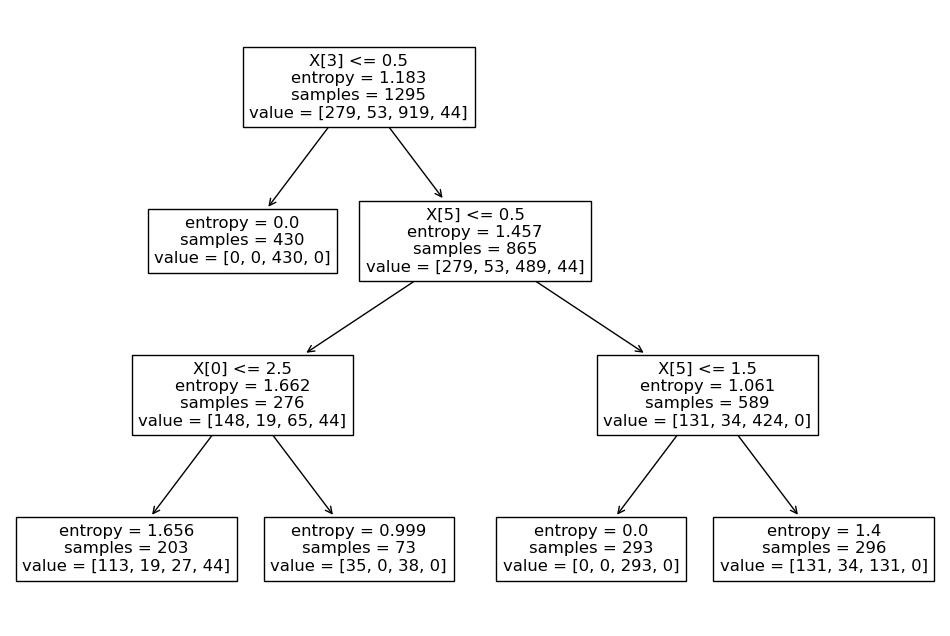

In [29]:
# evaluate model
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
print(y_pred_train_en[:5])

# plot tree
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [30]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 94   0  11   0]
 [ 16   0   0   0]
 [ 42   0 248   0]
 [ 21   0   0   0]]
